In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("Data_Preprocessing")

In [4]:
pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import openpyxl as opxl

In [6]:
pos = pd.read_excel("POS_Data.xlsx", parse_dates=["Date"])

In [7]:
pos.shape

(31185, 12)

In [8]:
pos.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Manufacturer,Sector,Category,Segment,Brand,Product
0,SKU1009,2021-01-02,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
1,SKU1009,2021-01-09,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
2,SKU1009,2021-01-16,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
3,SKU1009,2021-01-23,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
4,SKU1009,2021-01-30,0.0,0,NaN,0,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009


In [9]:
pos.dtypes

SKU_ID                  object
Date            datetime64[ns]
Page_traffic           float64
Revenue($)               int64
Unit_price             float64
Units_sold               int64
Manufacturer            object
Sector                  object
Category                object
Segment                 object
Brand                   object
Product                 object
dtype: object

In [10]:
pos.describe()

,Date,Page_traffic,Revenue($),Unit_price,Units_sold
count,31185,31185.000000,31185.000000,19635.000000,31185.000000
mean,2021-12-31 23:59:59.999999744,2053.829695,14386.877505,22.038169,702.274363
min,2021-01-02 00:00:00,0.000000,0.000000,0.103030,0.000000
25%,2021-07-03 00:00:00,0.000000,0.000000,16.311504,0.000000
50%,2022-01-01 00:00:00,1963.000000,14952.000000,20.746141,765.000000
75%,2022-07-02 00:00:00,3647.000000,25670.000000,25.423036,1224.000000
max,2022-12-31 00:00:00,10696.000000,48572.000000,94.133971,3386.000000
std,NaN,1979.574340,13427.614446,9.849729,647.676402


In [11]:
pos.describe(include="O")

,SKU_ID,Manufacturer,Sector,Category,Segment,Brand,Product
count,31185,31185,31185,31185,31185,31185,31185
unique,297,1,1,1,3,1,297
top,SKU1009,Synergix solutions,Personal Care,Beauty Products,Makeup,RadiantGlow,product_description_SKU1009
freq,105,31185,31185,31185,17220,31185,105


In [12]:
pos.isna().sum()

SKU_ID              0
Date                0
Page_traffic        0
Revenue($)          0
Unit_price      11550
Units_sold          0
Manufacturer        0
Sector              0
Category            0
Segment             0
Brand               0
Product             0
dtype: int64

In [13]:
pos = pos.drop(["Manufacturer", "Sector", "Category", "Brand", "Product"], axis=1)

In [14]:
pos.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup


In [15]:
pos.describe()

,Date,Page_traffic,Revenue($),Unit_price,Units_sold
count,31185,31185.000000,31185.000000,19635.000000,31185.000000
mean,2021-12-31 23:59:59.999999744,2053.829695,14386.877505,22.038169,702.274363
min,2021-01-02 00:00:00,0.000000,0.000000,0.103030,0.000000
25%,2021-07-03 00:00:00,0.000000,0.000000,16.311504,0.000000
50%,2022-01-01 00:00:00,1963.000000,14952.000000,20.746141,765.000000
75%,2022-07-02 00:00:00,3647.000000,25670.000000,25.423036,1224.000000
max,2022-12-31 00:00:00,10696.000000,48572.000000,94.133971,3386.000000
std,NaN,1979.574340,13427.614446,9.849729,647.676402


In [16]:
pos.describe(include="O")

,SKU_ID,Segment
count,31185,31185
unique,297,3
top,SKU1009,Makeup
freq,105,17220


In [17]:
pos["weekday"] = pos["Date"].dt.day_of_week

In [18]:
pos["weekday"].value_counts()

weekday
5    31185
Name: count, dtype: int64

Combining product attribute data with pos data

In [19]:
product = pd.read_excel("Product_Attribute_Data.xlsx")

In [20]:
product.shape

(99331, 13)

In [21]:
product.head()

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Video_Count,Bullet_Count,Title_Count,Description_Length
0,SKU1009,2021-01-09,52.0,28.0,68.0,158.0,984.0,Buy Box Winner - Owned,12,0,5,85,58
1,SKU1009,2021-01-10,52.0,28.0,68.0,159.0,989.0,Buy Box Winner - Owned,12,0,5,85,58
2,SKU1009,2021-01-11,52.0,28.0,69.0,160.0,994.0,Buy Box Winner - Owned,12,0,5,85,58
3,SKU1009,2021-01-12,52.0,28.0,69.0,161.0,1000.0,Buy Box Winner - Owned,12,0,5,85,58
4,SKU1009,2021-01-13,52.0,28.0,70.0,162.0,1005.0,Buy Box Winner - Owned,12,0,5,85,58


In [22]:
product.describe()

,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Video_Count,Bullet_Count,Title_Count,Description_Length
count,99331,85975.000000,84988.000000,84957.000000,84687.000000,84379.000000,99331.000000,99331.0,99331.000000,99331.000000,99331.000000
mean,2022-01-01 19:55:49.637072128,75.290038,53.501400,144.977318,295.173073,1937.907501,7.166454,0.0,6.560943,107.603820,137.196756
min,2021-01-02 00:00:00,10.000000,7.000000,16.000000,31.000000,153.000000,0.000000,0.0,4.000000,62.000000,54.000000
25%,2021-06-27 00:00:00,40.000000,29.000000,76.000000,153.000000,998.000000,2.000000,0.0,6.000000,84.000000,65.000000
50%,2022-01-01 00:00:00,68.000000,49.000000,129.000000,261.000000,1695.000000,8.000000,0.0,6.000000,100.000000,129.000000
75%,2022-07-12 00:00:00,99.000000,71.000000,192.000000,392.000000,2596.000000,11.000000,0.0,7.000000,126.000000,209.000000
max,2022-12-31 00:00:00,337.000000,240.000000,679.000000,1418.000000,9707.000000,16.000000,0.0,8.000000,173.000000,221.000000
std,NaN,46.039553,32.414642,90.798913,187.666308,1269.711505,4.948544,0.0,0.989463,28.611333,61.836353


In [23]:
product.describe(include="O")

,SKU_ID,Product_availability
count,99331,99331
unique,297,6
top,SKU1410,Buy Box Winner - Owned
freq,435,79823


In [24]:
product = product.drop(["Video_Count"], axis=1)

In [25]:
product.dtypes

SKU_ID                          object
Date                    datetime64[ns]
1_Star_Rating                  float64
2_Star_Rating                  float64
3_Star_Rating                  float64
4_Star_Rating                  float64
5_Star_Rating                  float64
Product_availability            object
Image_Count                      int64
Bullet_Count                     int64
Title_Count                      int64
Description_Length               int64
dtype: object

In [26]:
product.isna().sum()

SKU_ID                      0
Date                        0
1_Star_Rating           13356
2_Star_Rating           14343
3_Star_Rating           14374
4_Star_Rating           14644
5_Star_Rating           14952
Product_availability        0
Image_Count                 0
Bullet_Count                0
Title_Count                 0
Description_Length          0
dtype: int64

In [27]:
import calendar, datetime

In [28]:
product["weekend_date"] = product["Date"].apply(lambda x:x+datetime.timedelta((calendar.SATURDAY - x.weekday())%7))

In [29]:
product[product["SKU_ID"] == "SKU1011"][["weekend_date","Date"]]

,weekend_date,Date
309,2021-01-02,2021-01-02
310,2021-01-09,2021-01-03
311,2021-01-09,2021-01-04
312,2021-01-09,2021-01-05
313,2021-01-09,2021-01-06
...,...,...
683,2022-12-17,2022-12-13
684,2022-12-17,2022-12-14
685,2022-12-17,2022-12-15
686,2022-12-17,2022-12-16


In [30]:
product["weekend_date"].dt.weekday.value_counts()

weekend_date
5    99331
Name: count, dtype: int64

In [31]:
product[product["SKU_ID"]=="SKU1011"]

,SKU_ID,Date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Product_availability,Image_Count,Bullet_Count,Title_Count,Description_Length,weekend_date
309,SKU1011,2021-01-02,29.0,21.0,49.0,99.0,694.0,Buy Box Winner - Owned,5,5,91,59,2021-01-02
310,SKU1011,2021-01-03,30.0,22.0,50.0,102.0,713.0,Buy Box Winner - Owned,5,5,91,59,2021-01-09
311,SKU1011,2021-01-04,31.0,23.0,52.0,106.0,732.0,Buy Box Winner - Owned,5,5,91,59,2021-01-09
312,SKU1011,2021-01-05,32.0,24.0,54.0,110.0,751.0,Buy Box Winner - Owned,5,5,91,59,2021-01-09
313,SKU1011,2021-01-06,33.0,25.0,56.0,113.0,770.0,Buy Box Winner - Owned,5,5,91,59,2021-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,SKU1011,2022-12-13,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,2022-12-17
684,SKU1011,2022-12-14,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,2022-12-17
685,SKU1011,2022-12-15,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,2022-12-17
686,SKU1011,2022-12-16,75.0,50.0,118.0,237.0,1672.0,Buy Box Winner - Owned,5,5,91,59,2022-12-17


<Axes: xlabel='Date', ylabel='1_Star_Rating'>

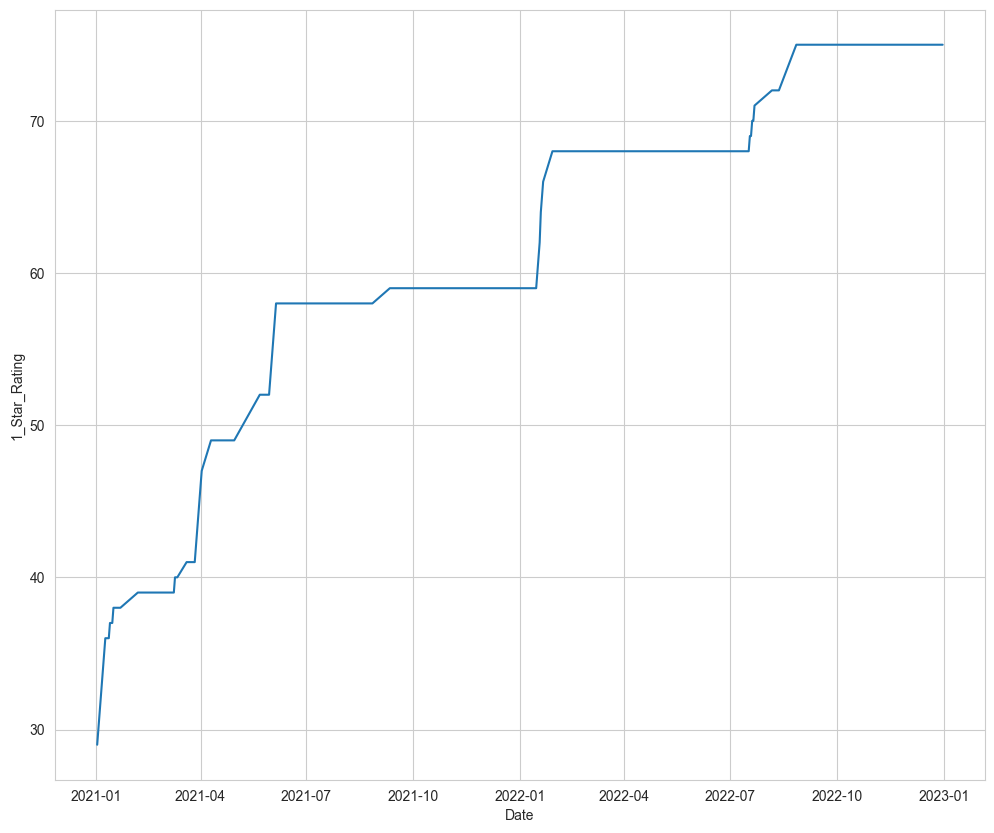

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
sns.lineplot(x=product[product["SKU_ID"]=="SKU1011"]["Date"], y=product[product["SKU_ID"]=="SKU1011"]["1_Star_Rating"])

In [33]:
product.columns

Index(['SKU_ID', 'Date', '1_Star_Rating', '2_Star_Rating', '3_Star_Rating',
       '4_Star_Rating', '5_Star_Rating', 'Product_availability', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length', 'weekend_date'],
      dtype='object')

In [34]:
cols = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating','4_Star_Rating', '5_Star_Rating', 'Image_Count',
        'Bullet_Count', 'Title_Count', 'Description_Length',]

In [35]:
product_agg = product.groupby(["weekend_date", "SKU_ID"])[cols].max().reset_index()

In [36]:
product_agg.head()

,weekend_date,SKU_ID,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length
0,2021-01-02,SKU1011,29.0,21.0,49.0,99.0,694.0,5,5,91,59
1,2021-01-02,SKU1014,46.0,22.0,42.0,77.0,409.0,0,5,79,99
2,2021-01-02,SKU1024,21.0,15.0,39.0,93.0,782.0,0,8,163,158
3,2021-01-02,SKU1025,28.0,7.0,45.0,102.0,786.0,2,6,90,62
4,2021-01-02,SKU1036,58.0,24.0,71.0,166.0,1239.0,12,8,126,221


In [37]:
product_agg.shape

(21915, 11)

In [38]:
data = pd.merge(pos, product_agg, how="left", left_on=["Date", "SKU_ID"], right_on=["weekend_date", "SKU_ID"])

In [39]:
data.head(3)

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,weekday,weekend_date,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,5,2021-01-09,52.0,28.0,68.0,158.0,984.0,12.0,5.0,85.0,58.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,5,2021-01-16,53.0,29.0,72.0,166.0,1022.0,12.0,5.0,85.0,58.0


In [40]:
data.columns

Index(['SKU_ID', 'Date', 'Page_traffic', 'Revenue($)', 'Unit_price',
       'Units_sold', 'Segment', 'weekday', 'weekend_date', '1_Star_Rating',
       '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating',
       'Image_Count', 'Bullet_Count', 'Title_Count', 'Description_Length'],
      dtype='object')

In [41]:
data = data.drop(['weekday', 'weekend_date'], axis=1)

In [42]:
data.shape

(31185, 16)

**Combining rest of the tables with data (combination of POS and Product attribute data)**

In [43]:
search = pd.read_excel("Search_Rank_Data.xlsx", parse_dates=["Date"])

In [44]:
search.shape

(25711, 4)

In [45]:
search.head(3)

,SKU_ID,Date,num_unique_Search_Terms,Organic Search Rank
0,SKU1009,2021-01-02,7,13.0
1,SKU1009,2021-01-09,8,22.0
2,SKU1009,2021-01-16,8,25.0


In [46]:
search.describe()

,Date,num_unique_Search_Terms,Organic Search Rank
count,25711,25711.000000,25711.000000
mean,2021-12-30 11:33:55.720119808,5.193186,19.025009
min,2021-01-02 00:00:00,1.000000,3.000000
25%,2021-06-26 00:00:00,3.000000,9.000000
50%,2022-01-01 00:00:00,5.000000,18.000000
75%,2022-07-02 00:00:00,7.000000,27.000000
max,2022-12-31 00:00:00,19.000000,53.000000
std,NaN,3.052156,11.679961


In [47]:
search.describe(include="O")

,SKU_ID
count,25711
unique,295
top,SKU1009
freq,105


In [48]:
data_set = set(data.SKU_ID.values)
search_set = set(search.SKU_ID.values)

In [49]:
data_set - data_set.intersection(search_set)

{'SKU780', 'SKU952'}

In [50]:
search["Date"].dt.weekday.value_counts()

Date
5    25711
Name: count, dtype: int64

In [51]:
data = pd.merge(data, search, how="left", left_on=["Date", "SKU_ID"], right_on=["Date", "SKU_ID"])

In [52]:
data.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,13.0
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,158.0,984.0,12.0,5.0,85.0,58.0,8.0,22.0
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,166.0,1022.0,12.0,5.0,85.0,58.0,8.0,25.0
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,8.0,15.0
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,8.0,18.0


In [53]:
data.shape

(31185, 18)

In [54]:
data_old = data

Analysing VPC data

In [55]:
vpc = pd.read_excel("VPC_Data.xlsx")

In [56]:
vpc["Date"].dt.weekday.value_counts()

Date
5    3194
Name: count, dtype: int64

In [57]:
vpc.dtypes

SKU_ID                                 object
Date                           datetime64[ns]
Num_of_Promotions                       int64
Variable Spend on Promotion             int64
Sum of Spend                          float64
dtype: object

In [58]:
vpc.head()

,SKU_ID,Date,Num_of_Promotions,Variable Spend on Promotion,Sum of Spend
0,SKU1009,2021-11-06,1,430,1071.309703
1,SKU1009,2021-11-13,1,348,860.905508
2,SKU1009,2021-11-20,1,291,714.049918
3,SKU1009,2021-11-27,1,143,325.593408
4,SKU1009,2022-03-05,1,29,79.058869


In [59]:
vpc = vpc.drop("Variable Spend on Promotion", axis=1)

In [60]:
data_new = pd.merge(data, vpc, how="left", left_on=["SKU_ID", "Date"], right_on=["SKU_ID", "Date"])

In [61]:
data_new.shape

(31185, 20)

In [62]:
data_new.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,13.0,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,158.0,984.0,12.0,5.0,85.0,58.0,8.0,22.0,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,166.0,1022.0,12.0,5.0,85.0,58.0,8.0,25.0,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,8.0,15.0,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,169.0,1040.0,12.0,5.0,85.0,58.0,8.0,18.0,NaN,NaN


Analysing Online Data

In [63]:
online = pd.read_excel("Online_Data.xlsx", parse_dates=["Date"])

In [64]:
online.shape

(10152, 6)

In [65]:
online.head()

,SKU_ID,Date,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
0,SKU1009,2021-05-15,474,1678.909243,53917,2
1,SKU1009,2021-06-12,1093,7198.857206,178173,2
2,SKU1009,2021-07-24,1041,5606.850110,224078,2
3,SKU1009,2021-07-31,965,4189.187114,191202,2
4,SKU1009,2021-08-07,860,2890.776596,212875,2


In [66]:
online.describe()

,Date,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
count,10152,10152.000000,10152.000000,10152.000000,10152.000000
mean,2022-02-26 13:49:04.680850944,877.809496,3003.103046,159665.350473,3.105004
min,2021-01-02 00:00:00,372.000000,918.221774,49971.000000,2.000000
25%,2021-10-16 00:00:00,609.000000,1824.467267,93239.000000,2.000000
50%,2022-03-19 00:00:00,791.500000,2655.097905,134674.000000,2.000000
75%,2022-08-06 00:00:00,1069.000000,3655.659412,196578.000000,4.000000
max,2022-12-31 00:00:00,2774.000000,14766.997351,830774.000000,10.000000
std,NaN,369.477510,1703.249376,95716.397595,1.326884


In [67]:
online.describe(include="O")

,SKU_ID
count,10152
unique,249
top,SKU800
freq,97


In [68]:
online["Date"].dt.weekday.value_counts()

Date
5    10152
Name: count, dtype: int64

In [69]:
data_new_set = set(data_new.SKU_ID.values)
online_set = set(online.SKU_ID.values)

In [70]:
len(data_new_set - data_new_set.intersection(online_set))

48

In [71]:
data_new_2 = pd.merge(data_new, online, how="left", on=["Date", "SKU_ID"])

In [72]:
data_new_2.shape

(31185, 24)

In [73]:
data_new = data_new_2

In [74]:
data_new.shape

(31185, 24)

In [75]:
data_new.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,...,NaN,NaN,7.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,...,85.0,58.0,8.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,85.0,58.0,8.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,85.0,58.0,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,85.0,58.0,8.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


Analysing Offline Data

In [76]:
offline  = pd.read_excel("Offline_Data.xlsx", parse_dates=["Date"])

In [77]:
offline.shape

(38, 10)

In [78]:
offline.head()

,Country,Brand,Date,Clicks_image,Clicks_video,Cost_image,Cost_video,Impressions_image,Impressions_video,num_unique_campaigns
0,Country,Brand,2021-07-24,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2
1,Country,Brand,2021-07-31,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2
2,Country,Brand,2021-08-07,1848.0,5812,22527.47,70287.25,1518866.0,7108033,2
3,Country,Brand,2021-08-14,2614.0,9880,25734.03,102695.19,2035637.0,8531176,4
4,Country,Brand,2021-08-21,1989.0,6375,22497.13,77040.81,1549175.0,7539723,2


In [79]:
offline.describe()

,Date,Clicks_image,Clicks_video,Cost_image,Cost_video,Impressions_image,Impressions_video,num_unique_campaigns
count,38,25.000000,38.000000,25.000000,38.000000,2.500000e+01,3.800000e+01,38.000000
mean,2021-12-10 10:44:12.631578880,1857.240000,6480.263158,20573.035600,74695.607368,1.619379e+06,6.907338e+06,2.894737
min,2021-07-24 00:00:00,0.000000,3219.000000,0.000000,40244.280000,0.000000e+00,3.856872e+06,2.000000
25%,2021-09-26 18:00:00,1446.000000,4938.000000,20314.380000,57575.980000,1.473192e+06,5.547651e+06,2.000000
50%,2021-11-30 12:00:00,1989.000000,5744.000000,22527.470000,63978.200000,1.549175e+06,6.594469e+06,2.000000
75%,2022-02-24 06:00:00,2614.000000,7049.750000,25734.030000,83703.337500,2.035637e+06,7.539723e+06,4.000000
max,2022-04-30 00:00:00,3425.000000,11557.000000,34273.050000,130779.050000,3.469776e+06,1.092277e+07,6.000000
std,NaN,936.071546,2437.052115,9042.155713,24819.709951,8.293666e+05,1.824577e+06,1.448008


In [80]:
offline.describe(include="O")

,Country,Brand
count,38,38
unique,1,1
top,Country,Brand
freq,38,38


In [81]:
offline.isna().sum()

Country                  0
Brand                    0
Date                     0
Clicks_image            13
Clicks_video             0
Cost_image              13
Cost_video               0
Impressions_image       13
Impressions_video        0
num_unique_campaigns     0
dtype: int64

In [82]:
offline = offline.drop(["Clicks_image", "Cost_image", "Impressions_image", "Country", "Brand"], axis=1)

In [83]:
offline.head()

,Date,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns
0,2021-07-24,6375,77040.81,7539723,2
1,2021-07-31,6375,77040.81,7539723,2
2,2021-08-07,5812,70287.25,7108033,2
3,2021-08-14,9880,102695.19,8531176,4
4,2021-08-21,6375,77040.81,7539723,2


In [84]:
offline["Date"].dt.weekday.value_counts()

Date
5    38
Name: count, dtype: int64

In [85]:
offline = offline.rename(columns={"num_unique_campaigns":"num_unique_campaigns_offline"})

In [86]:
offline.head()

,Date,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,2021-07-24,6375,77040.81,7539723,2
1,2021-07-31,6375,77040.81,7539723,2
2,2021-08-07,5812,70287.25,7108033,2
3,2021-08-14,9880,102695.19,8531176,4
4,2021-08-21,6375,77040.81,7539723,2


In [87]:
data_new = pd.merge(data_new, offline, how="left", on="Date")

In [88]:
data_new.head()

,SKU_ID,Date,Page_traffic,Revenue($),Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,SKU1009,2021-01-02,0.0,0,NaN,0,Makeup,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKU1009,2021-01-09,0.0,0,NaN,0,Makeup,52.0,28.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SKU1009,2021-01-16,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SKU1009,2021-01-23,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKU1009,2021-01-30,0.0,0,NaN,0,Makeup,53.0,29.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
data_new.shape

(31185, 28)

Analysing dataframe

In [90]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   SKU_ID                        31185 non-null  object        
 1   Date                          31185 non-null  datetime64[ns]
 2   Page_traffic                  31185 non-null  float64       
 3   Revenue($)                    31185 non-null  int64         
 4   Unit_price                    19635 non-null  float64       
 5   Units_sold                    31185 non-null  int64         
 6   Segment                       31185 non-null  object        
 7   1_Star_Rating                 18967 non-null  float64       
 8   2_Star_Rating                 18750 non-null  float64       
 9   3_Star_Rating                 18748 non-null  float64       
 10  4_Star_Rating                 18697 non-null  float64       
 11  5_Star_Rating               

Dependent variable is Units Sold

In [91]:
data_new.describe()

,Date,Page_traffic,Revenue($),Unit_price,Units_sold,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
count,31185,31185.000000,31185.000000,19635.000000,31185.000000,18967.000000,18750.000000,18748.000000,18697.000000,18619.000000,...,3194.000000,3194.000000,10152.000000,10152.000000,10152.000000,10152.000000,11286.000000,11286.000000,1.128600e+04,11286.000000
mean,2021-12-31 23:59:59.999999744,2053.829695,14386.877505,22.038169,702.274363,75.447936,53.615680,145.289258,295.620581,1941.743004,...,1.014402,407.362038,877.809496,3003.103046,159665.350473,3.105004,6480.263158,74695.607368,6.907338e+06,2.894737
min,2021-01-02 00:00:00,0.000000,0.000000,0.103030,0.000000,10.000000,7.000000,16.000000,31.000000,153.000000,...,1.000000,0.000000,372.000000,918.221774,49971.000000,2.000000,3219.000000,40244.280000,3.856872e+06,2.000000
25%,2021-07-03 00:00:00,0.000000,0.000000,16.311504,0.000000,40.000000,29.000000,76.000000,153.000000,998.000000,...,1.000000,123.256904,609.000000,1824.467267,93239.000000,2.000000,4791.000000,56344.760000,5.344861e+06,2.000000
50%,2022-01-01 00:00:00,1963.000000,14952.000000,20.746141,765.000000,68.000000,49.000000,130.000000,262.000000,1707.000000,...,1.000000,252.476836,791.500000,2655.097905,134674.000000,2.000000,5744.000000,63978.200000,6.594469e+06,2.000000
75%,2022-07-02 00:00:00,3647.000000,25670.000000,25.423036,1224.000000,99.000000,71.000000,193.000000,393.000000,2611.000000,...,1.000000,567.022259,1069.000000,3655.659412,196578.000000,4.000000,7236.000000,83933.100000,7.539723e+06,4.000000
max,2022-12-31 00:00:00,10696.000000,48572.000000,94.133971,3386.000000,337.000000,240.000000,679.000000,1418.000000,9707.000000,...,2.000000,2689.728363,2774.000000,14766.997351,830774.000000,10.000000,11557.000000,130779.050000,1.092277e+07,6.000000
std,NaN,1979.574340,13427.614446,9.849729,647.676402,46.155850,32.488329,91.029103,187.916058,1270.881736,...,0.119160,414.741065,369.477510,1703.249376,95716.397595,1.326884,2404.878398,24492.042642,1.800489e+06,1.428892


<Axes: xlabel='Units_sold', ylabel='Count'>

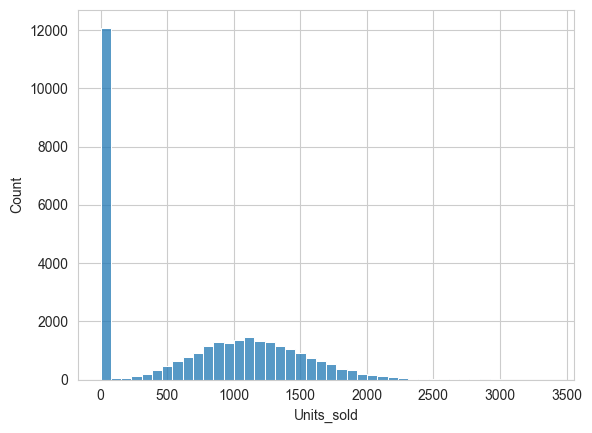

In [92]:
sns.histplot(data_new["Units_sold"])

In [93]:
filtered_data = data_new[data_new["Units_sold"] > 0]

<Axes: xlabel='Units_sold', ylabel='Count'>

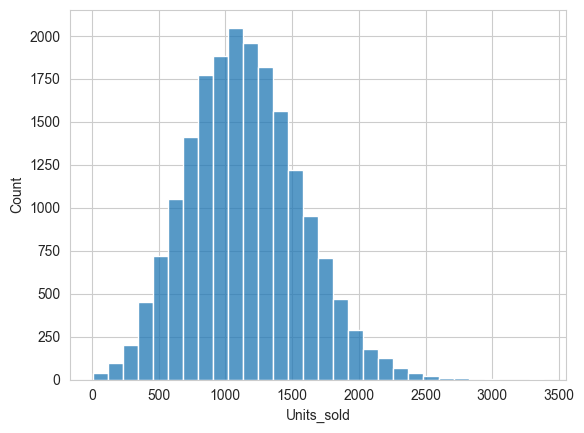

In [94]:
sns.histplot(data= filtered_data, x=filtered_data["Units_sold"], bins=30)

<Axes: >

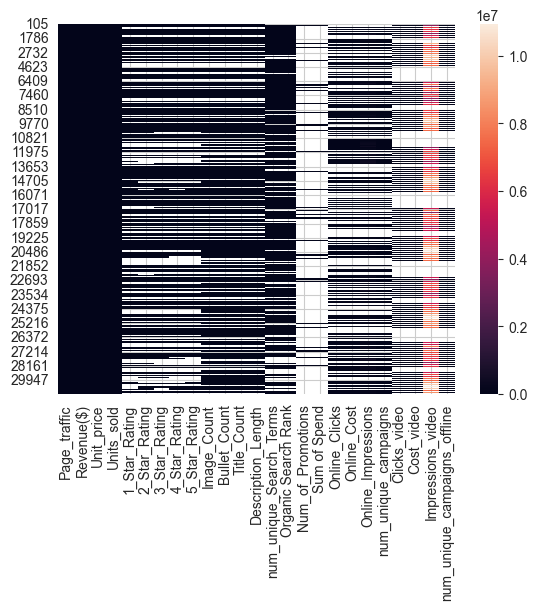

In [95]:
sns.heatmap(filtered_data.select_dtypes(exclude=["object", "datetime64[ns]"]))

In [96]:
filtered_data.dtypes

SKU_ID                                  object
Date                            datetime64[ns]
Page_traffic                           float64
Revenue($)                               int64
Unit_price                             float64
Units_sold                               int64
Segment                                 object
1_Star_Rating                          float64
2_Star_Rating                          float64
3_Star_Rating                          float64
4_Star_Rating                          float64
5_Star_Rating                          float64
Image_Count                            float64
Bullet_Count                           float64
Title_Count                            float64
Description_Length                     float64
num_unique_Search_Terms                float64
Organic Search Rank                    float64
Num_of_Promotions                      float64
Sum of Spend                           float64
Online_Clicks                          float64
Online_Cost  

<Axes: >

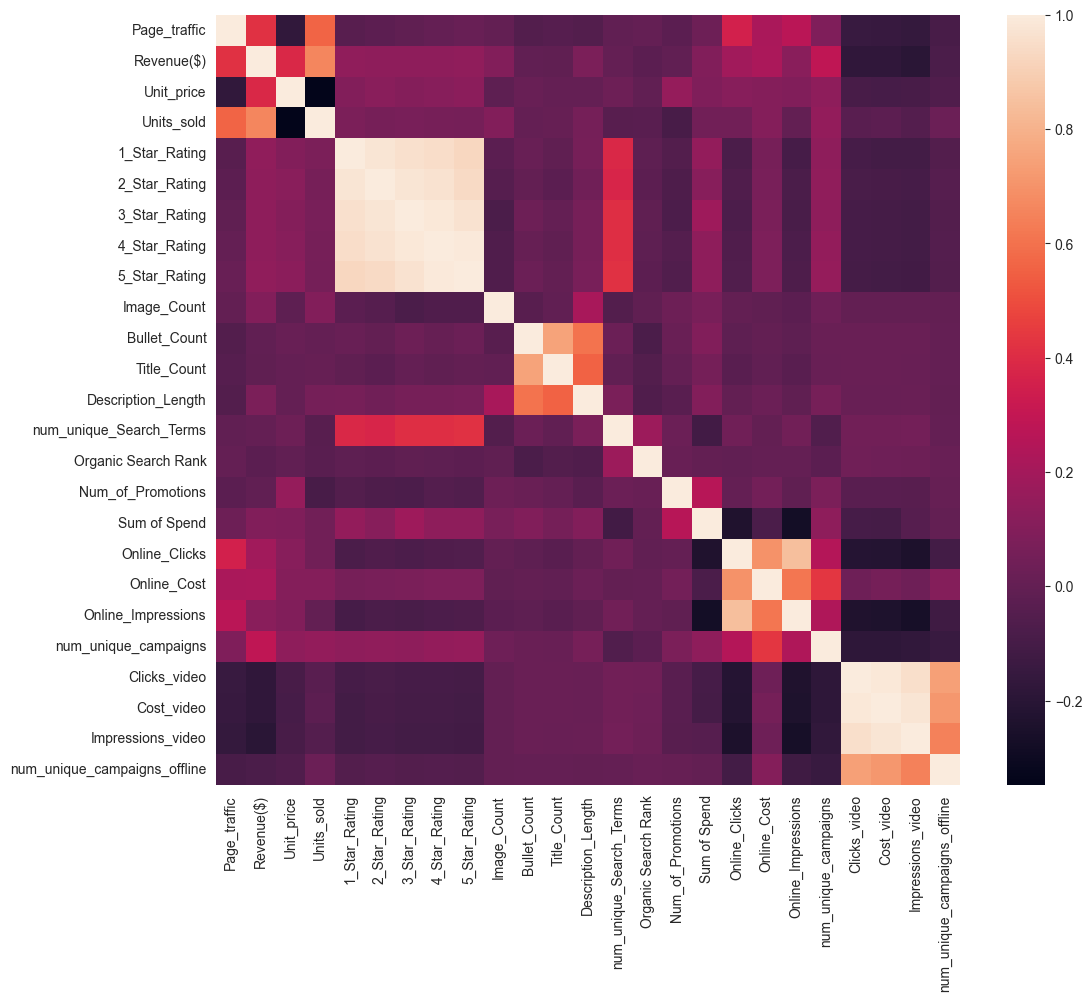

In [97]:
plt.figure(figsize=(12,10))
sns.heatmap(filtered_data.select_dtypes(include=["int64", "float64"]).corr())

Since the company wants to focus only on those variables which bring in sales, we need to focus on those values where page traffic is greater than 0

In [98]:
data_focus = data_new[data_new["Page_traffic"]>0]

In [99]:
data_focus.shape

(19631, 28)

In [100]:
data_focus.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,19631,2021-12-31 04:00:00.733533696,2021-01-02 00:00:00,2021-06-26 00:00:00,2022-01-01 00:00:00,2022-07-02 00:00:00,2022-12-31 00:00:00,NaN
Page_traffic,19631.0,3262.629466,5.0,2207.0,3275.0,4249.0,10696.0,1510.350882
Revenue($),19631.0,22854.402476,0.0,16483.5,23098.0,29767.0,48572.0,9638.143686
Unit_price,19235.0,21.491858,0.10303,16.339797,20.700226,25.280734,94.133971,7.845159
Units_sold,19631.0,1115.604197,0.0,825.0,1114.0,1410.0,3386.0,453.048322
1_Star_Rating,12020.0,75.057404,10.0,40.0,68.0,98.0,301.0,44.834974
2_Star_Rating,11889.0,53.646396,7.0,29.0,49.0,71.0,197.0,31.602739
3_Star_Rating,11919.0,144.399278,16.0,75.0,130.0,192.0,557.0,88.950386
4_Star_Rating,11832.0,295.551809,31.0,156.0,261.0,392.0,1180.0,182.9261
5_Star_Rating,11762.0,1941.880292,153.0,1036.0,1701.0,2610.75,7950.0,1230.135878


Treating NULL values

In [101]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                        396
Units_sold                          0
Segment                             0
1_Star_Rating                    7611
2_Star_Rating                    7742
3_Star_Rating                    7712
4_Star_Rating                    7799
5_Star_Rating                    7869
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [102]:
a = data_focus[data_focus["Unit_price"].isnull()]["SKU_ID"].unique()
print(a)

['SKU1014' 'SKU1053' 'SKU106' 'SKU1066' 'SKU1067' 'SKU1072' 'SKU1086'
 'SKU1092' 'SKU118' 'SKU1183' 'SKU123' 'SKU1237' 'SKU1245' 'SKU1270'
 'SKU1317' 'SKU1332' 'SKU1458' 'SKU1459' 'SKU1510' 'SKU1531' 'SKU1546'
 'SKU1597' 'SKU1598' 'SKU1625' 'SKU1628' 'SKU1651' 'SKU1719' 'SKU1723'
 'SKU1733' 'SKU1763' 'SKU183' 'SKU1834' 'SKU1911' 'SKU1954' 'SKU1990'
 'SKU225' 'SKU234' 'SKU257' 'SKU278' 'SKU289' 'SKU300' 'SKU305' 'SKU330'
 'SKU352' 'SKU675' 'SKU731' 'SKU761' 'SKU866' 'SKU930' 'SKU937' 'SKU968'
 'SKU989']


find the proportion of null price in unit price columns for each SKU

In [103]:
for i in a:
  proportion = len(data_focus[(data_focus["SKU_ID"]==i) & (data_focus["Unit_price"].isnull())]) / len((data_focus[data_focus["SKU_ID"]==i]))
  print(f"{i}:{proportion}")

SKU1014:1.0
SKU1053:1.0
SKU106:1.0
SKU1066:1.0
SKU1067:1.0
SKU1072:1.0
SKU1086:1.0
SKU1092:1.0
SKU118:1.0
SKU1183:1.0
SKU123:1.0
SKU1237:1.0
SKU1245:1.0
SKU1270:1.0
SKU1317:1.0
SKU1332:1.0
SKU1458:1.0
SKU1459:1.0
SKU1510:1.0
SKU1531:1.0
SKU1546:1.0
SKU1597:1.0
SKU1598:1.0
SKU1625:1.0
SKU1628:1.0
SKU1651:1.0
SKU1719:1.0
SKU1723:1.0
SKU1733:1.0
SKU1763:1.0
SKU183:1.0
SKU1834:1.0
SKU1911:1.0
SKU1954:1.0
SKU1990:1.0
SKU225:1.0
SKU234:1.0
SKU257:1.0
SKU278:1.0
SKU289:1.0
SKU300:1.0
SKU305:1.0
SKU330:1.0
SKU352:1.0
SKU675:1.0
SKU731:1.0
SKU761:1.0
SKU866:1.0
SKU930:1.0
SKU937:1.0
SKU968:1.0
SKU989:1.0


In [104]:
data_focus.groupby("Segment")["Unit_price"].median()

Segment
Hair Care    21.283951
Makeup       20.905660
Skincare     20.099526
Name: Unit_price, dtype: float64

In [105]:
data_focus["Unit_price"] = data_focus.groupby("Segment")["Unit_price"].transform(lambda x:x.fillna(x.median()))

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\3423360264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus["Unit_price"] = data_focus.groupby("Segment")["Unit_price"].transform(lambda x:x.fillna(x.median()))


In [106]:
data_focus["Unit_price"].isna().sum()

0

In [107]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                    7611
2_Star_Rating                    7742
3_Star_Rating                    7712
4_Star_Rating                    7799
5_Star_Rating                    7869
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [108]:
type(data_focus[["1_Star_Rating", "2_Star_Rating"]])

pandas.core.frame.DataFrame

Ratings are cumulative in nature hence missing values will be filled with the last week's rating numbers of that SKU_ID

In [109]:
columns_to_fill = ["1_Star_Rating","2_Star_Rating", "3_Star_Rating", "4_Star_Rating", "5_Star_Rating"]

In [110]:
data_focus[columns_to_fill] = data_focus.groupby("SKU_ID")[columns_to_fill].apply(lambda group:group.ffill()).reset_index(level=0, drop=True)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\2970733384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill] = data_focus.groupby("SKU_ID")[columns_to_fill].apply(lambda group:group.ffill()).reset_index(level=0, drop=True)


In [111]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                    2786
2_Star_Rating                    2952
3_Star_Rating                    2930
4_Star_Rating                    3056
5_Star_Rating                    3160
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [112]:
data_focus[columns_to_fill] = data_focus[columns_to_fill].fillna(0)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\1667100170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill] = data_focus[columns_to_fill].fillna(0)


In [113]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                      5840
Bullet_Count                     5840
Title_Count                      5840
Description_Length               5840
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [114]:
columns_to_fill_with_median = ["Image_Count", "Bullet_Count", "Title_Count", "Description_Length"]

In [115]:
for col in columns_to_fill_with_median:
  data_focus[col] = data_focus.groupby("SKU_ID")[col].transform(lambda x:x.fillna(x.median()))

c:\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\2823006971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[col] = data_focus.groupby("SKU_ID")[col].transform(lambda x:x.fillna(x.median()))
c:\Python\Python311\Lib\site-packages\numpy\lib\nanfun

In [116]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         3
Bullet_Count                        3
Title_Count                         3
Description_Length                  3
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [117]:
data_focus[columns_to_fill_with_median] = data_focus[columns_to_fill_with_median].fillna(data_focus[columns_to_fill_with_median].median())

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\2084980767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_with_median] = data_focus[columns_to_fill_with_median].fillna(data_focus[columns_to_fill_with_median].median())


In [118]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
num_unique_Search_Terms          3583
Organic Search Rank              3583
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [119]:
data_focus["Organic Search Rank"] = data_focus.groupby("SKU_ID")["Organic Search Rank"].apply(lambda group:group.ffill()).reset_index(level=0, drop=True)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\3243004911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus["Organic Search Rank"] = data_focus.groupby("SKU_ID")["Organic Search Rank"].apply(lambda group:group.ffill()).reset_index(level=0, drop=True)


In [120]:
data_focus.isna().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
num_unique_Search_Terms          3583
Organic Search Rank               587
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [121]:
data_focus["Organic Search Rank"] = data_focus.groupby("Segment")["Organic Search Rank"].transform(lambda x:x.fillna(x.median()))

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\1287969106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus["Organic Search Rank"] = data_focus.groupby("Segment")["Organic Search Rank"].transform(lambda x:x.fillna(x.median()))


In [122]:
data_focus["Organic Search Rank"].isnull().sum()

0

In [123]:
data_focus["num_unique_Search_Terms"] = data_focus["num_unique_Search_Terms"].fillna(0)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\426819789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus["num_unique_Search_Terms"] = data_focus["num_unique_Search_Terms"].fillna(0)


In [124]:
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
num_unique_Search_Terms             0
Organic Search Rank                 0
Num_of_Promotions               17565
Sum of Spend                    17565
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [125]:
columns_to_fill_2 = ["Sum of Spend", "Num_of_Promotions"]

In [126]:
data_focus[columns_to_fill_2] = data_focus[columns_to_fill_2].fillna(0)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\3468624338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_2] = data_focus[columns_to_fill_2].fillna(0)


In [127]:
data_focus_bkp = data_focus

In [128]:
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
num_unique_Search_Terms             0
Organic Search Rank                 0
Num_of_Promotions                   0
Sum of Spend                        0
Online_Clicks                   10035
Online_Cost                     10035
Online_Impressions              10035
num_unique_campaigns            10035
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [129]:
columns_to_fill_3 = ['Online_Clicks', 'Online_Cost', 'Online_Impressions', 'num_unique_campaigns']

In [130]:
#impute the values with 0
data_focus[columns_to_fill_3] = data_focus[columns_to_fill_3].fillna(0)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\3382507709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus[columns_to_fill_3] = data_focus[columns_to_fill_3].fillna(0)


In [131]:
data_focus.isnull().sum()

SKU_ID                              0
Date                                0
Page_traffic                        0
Revenue($)                          0
Unit_price                          0
Units_sold                          0
Segment                             0
1_Star_Rating                       0
2_Star_Rating                       0
3_Star_Rating                       0
4_Star_Rating                       0
5_Star_Rating                       0
Image_Count                         0
Bullet_Count                        0
Title_Count                         0
Description_Length                  0
num_unique_Search_Terms             0
Organic Search Rank                 0
Num_of_Promotions                   0
Sum of Spend                        0
Online_Clicks                       0
Online_Cost                         0
Online_Impressions                  0
num_unique_campaigns                0
Clicks_video                    12550
Cost_video                      12550
Impressions_

In [132]:
data_focus.fillna(0, inplace=True)

C:\Users\Shailendra29\AppData\Local\Temp\ipykernel_11584\541372889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus.fillna(0, inplace=True)


In [133]:
data_focus.isna().sum()

SKU_ID                          0
Date                            0
Page_traffic                    0
Revenue($)                      0
Unit_price                      0
Units_sold                      0
Segment                         0
1_Star_Rating                   0
2_Star_Rating                   0
3_Star_Rating                   0
4_Star_Rating                   0
5_Star_Rating                   0
Image_Count                     0
Bullet_Count                    0
Title_Count                     0
Description_Length              0
num_unique_Search_Terms         0
Organic Search Rank             0
Num_of_Promotions               0
Sum of Spend                    0
Online_Clicks                   0
Online_Cost                     0
Online_Impressions              0
num_unique_campaigns            0
Clicks_video                    0
Cost_video                      0
Impressions_video               0
num_unique_campaigns_offline    0
dtype: int64

In [134]:
data_focus_bkp = data_focus

Preparing dataset for 
1) Which factors impact units sold --> Supervised model
2) Which products/segments will have units sold >1000 --> Supervised model
3) Which products need to be bundled together --> Unsupervised model

In [135]:
file_path = "C:/Users/Shailendra29/PycharmProjects/Analytics Vidhya/Building_First_ML_Model/Datasets/dataset.csv"
data_focus.to_csv(file_path, index=False)

Supervised Models

In [136]:
data_final = data_focus.sample(frac=1, random_state=1)

In [137]:
data_final.shape, data_focus.shape

((19631, 28), (19631, 28))

In [138]:
data_final_bkp = data_final

In [139]:
data_final["Units_sold_1000+"] = (data_final.Units_sold > 1000)*1

In [140]:
data_final.columns

Index(['SKU_ID', 'Date', 'Page_traffic', 'Revenue($)', 'Unit_price',
       'Units_sold', 'Segment', '1_Star_Rating', '2_Star_Rating',
       '3_Star_Rating', '4_Star_Rating', '5_Star_Rating', 'Image_Count',
       'Bullet_Count', 'Title_Count', 'Description_Length',
       'num_unique_Search_Terms', 'Organic Search Rank', 'Num_of_Promotions',
       'Sum of Spend', 'Online_Clicks', 'Online_Cost', 'Online_Impressions',
       'num_unique_campaigns', 'Clicks_video', 'Cost_video',
       'Impressions_video', 'num_unique_campaigns_offline',
       'Units_sold_1000+'],
      dtype='object')

Removing irrelevant columns for supervised model

In [141]:
data_fe = data_final.drop(["SKU_ID", "Revenue($)"], axis=1)

In [142]:
data_fe.head()

,Date,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold_1000+
11196,2022-04-09,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
8628,2021-05-08,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
31078,2022-12-24,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3032,2022-10-08,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
23269,2022-03-26,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [143]:
file_path = "C:/Users/Shailendra29/PycharmProjects/Analytics Vidhya/Building_First_ML_Model/Datasets/data_fe.csv"

In [144]:
data_fe.to_csv(file_path, index=False)

In [145]:
data_final_bkp = data_final

In [146]:
data_final.drop(["SKU_ID", "Revenue($)", "Date"], axis=1, inplace=True)

In [147]:
data_final.columns

Index(['Page_traffic', 'Unit_price', 'Units_sold', 'Segment', '1_Star_Rating',
       '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating',
       'Image_Count', 'Bullet_Count', 'Title_Count', 'Description_Length',
       'num_unique_Search_Terms', 'Organic Search Rank', 'Num_of_Promotions',
       'Sum of Spend', 'Online_Clicks', 'Online_Cost', 'Online_Impressions',
       'num_unique_campaigns', 'Clicks_video', 'Cost_video',
       'Impressions_video', 'num_unique_campaigns_offline',
       'Units_sold_1000+'],
      dtype='object')

In [148]:
filepath = "Datasets/Synergix_data_preprocessed_new.csv"

In [149]:
data_final.to_csv(file_path, index=False)

## **Building the first KNN model**

Classification problem which will answer the question which product will sell more than 1000 units

In [150]:
data_final.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold_1000+
11196,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
8628,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
31078,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3032,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
23269,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [151]:
# Since it is a classification problem to predict units sold > 1000, to avoid confusing models, we will drop units sold column
data_final.drop("Units_sold", axis=1, inplace=True)

In [152]:
data_final.head()

,Page_traffic,Unit_price,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold_1000+
11196,5835.0,22.214389,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
8628,1881.0,11.870778,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,8.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
31078,2477.0,27.645714,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,7.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3032,4087.0,16.896848,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,7.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
23269,1446.0,16.357664,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,8.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [153]:
rating_ratio = []
ratio = 0
#accessing each data point from the dataframe
for row in data_final.values:
  if (row[3]+row[4] == 0):
    if (row[6]+row[7] == 0):
      rating_ratio.append(0.0)
    else:
      rating_ratio.append(-99999)
  
  else:
    ratio = (int(row[6])+int(row[7])) / (int(row[3]) + int(row[4]))
    rating_ratio.append(ratio)

#replacing -99999 with max_rating
max_rating = max(rating_ratio)
for e in range(len(rating_ratio)):
  if (rating_ratio[e] == -99999):
    rating_ratio[e] = max_rating

In [154]:
for e in range(len(rating_ratio)):
  new_value = round(rating_ratio[e],ndigits=3)
  rating_ratio[e] = new_value


In [155]:
rating_ratio

[21.784,
 18.398,
 20.275,
 16.171,
 26.811,
 17.607,
 0.0,
 22.139,
 11.765,
 71.727,
 18.394,
 14.017,
 19.597,
 24.941,
 38.324,
 12.248,
 19.492,
 21.087,
 17.91,
 0.0,
 23.789,
 28.047,
 22.657,
 14.222,
 0.0,
 1.426,
 14.912,
 18.224,
 9.439,
 17.083,
 7.651,
 0.0,
 45.0,
 30.951,
 20.103,
 24.349,
 17.304,
 2.663,
 26.326,
 19.837,
 0.0,
 22.0,
 17.607,
 7.494,
 16.895,
 22.845,
 17.338,
 18.545,
 17.0,
 25.91,
 0.0,
 20.155,
 17.338,
 13.318,
 20.707,
 15.667,
 0.0,
 0.0,
 19.761,
 13.899,
 23.843,
 16.547,
 0.0,
 21.667,
 71.727,
 16.779,
 14.886,
 15.452,
 16.106,
 16.889,
 14.114,
 0.0,
 15.044,
 15.461,
 1.426,
 18.739,
 2.663,
 0.0,
 13.502,
 10.974,
 12.423,
 18.667,
 0.0,
 14.066,
 22.647,
 26.545,
 15.692,
 23.818,
 0.0,
 17.025,
 11.568,
 31.0,
 18.311,
 16.299,
 21.469,
 17.524,
 18.898,
 0.0,
 0.0,
 18.07,
 16.299,
 0.0,
 12.923,
 0.0,
 8.37,
 22.054,
 14.031,
 16.667,
 24.386,
 18.593,
 13.168,
 11.748,
 0.0,
 19.554,
 26.487,
 29.047,
 18.474,
 26.391,
 0.0,
 15.12

In [156]:
data_final["Good_Bad_Rating_Ratio"] = rating_ratio

In [157]:
data_final.head()

,Page_traffic,Unit_price,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold_1000+,Good_Bad_Rating_Ratio
11196,5835.0,22.214389,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,6.0,...,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1,21.784
8628,1881.0,11.870778,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,8.0,...,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0,18.398
31078,2477.0,27.645714,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,7.0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0,20.275
3032,4087.0,16.896848,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,7.0,...,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1,16.171
23269,1446.0,16.357664,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,8.0,...,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0,26.811


In [158]:
data_final.drop(columns=["1_Star_Rating", "2_Star_Rating", "3_Star_Rating", "4_Star_Rating", "5_Star_Rating"], axis=1, inplace=True)

In [159]:
data_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Page_traffic,19631.0,3.262629e+03,1.510351e+03,5.00000,2207.000000,3275.000000,4.249000e+03,1.069600e+04
Unit_price,19631.0,2.147737e+01,7.766503e+00,0.10303,16.462334,20.771795,2.511978e+01,9.413397e+01
Image_Count,19631.0,6.822373e+00,4.894546e+00,0.00000,0.000000,8.000000,1.000000e+01,1.600000e+01
Bullet_Count,19631.0,6.602924e+00,9.754446e-01,4.00000,6.000000,6.000000,7.000000e+00,8.000000e+00
Title_Count,19631.0,1.085237e+02,2.982934e+01,62.00000,84.000000,105.000000,1.260000e+02,1.730000e+02
Description_Length,19631.0,1.406730e+02,6.082749e+01,54.00000,68.000000,149.000000,2.090000e+02,2.210000e+02
num_unique_Search_Terms,19631.0,4.132902e+00,3.361481e+00,0.00000,1.000000,4.000000,6.000000e+00,1.800000e+01
Organic Search Rank,19631.0,1.896378e+01,1.156774e+01,3.00000,10.000000,19.000000,2.700000e+01,5.300000e+01
Num_of_Promotions,19631.0,1.062096e-01,3.112390e-01,0.00000,0.000000,0.000000,0.000000e+00,2.000000e+00
Sum of Spend,19631.0,4.286598e+01,1.828050e+02,0.00000,0.000000,0.000000,0.000000e+00,2.689728e+03


Performing one-hot encoding on segments column as scikit-learn library takes only numerical inputs

In [160]:
data_final = pd.get_dummies(data_final, columns=["Segment"], prefix="Segment", drop_first=True)

In [161]:
data_final.head()

,Page_traffic,Unit_price,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend,...,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold_1000+,Good_Bad_Rating_Ratio,Segment_Makeup,Segment_Skincare
11196,5835.0,22.214389,6.0,6.0,89.0,141.0,3.0,3.0,0.0,0.0,...,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1,21.784,False,True
8628,1881.0,11.870778,9.0,8.0,126.0,149.0,13.0,16.0,0.0,0.0,...,75868.0,2.0,0.0,0.00,0.0,0.0,0,18.398,False,True
31078,2477.0,27.645714,10.0,7.0,152.0,186.0,4.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0,20.275,True,False
3032,4087.0,16.896848,5.0,7.0,117.0,209.0,7.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,1,16.171,True,False
23269,1446.0,16.357664,0.0,8.0,165.0,158.0,4.0,16.0,0.0,0.0,...,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0,26.811,False,False


Performing train-test split

In [162]:
y = data_final["Units_sold_1000+"]
X = data_final.drop("Units_sold_1000+", axis=1) 

In [163]:
X.shape, y.shape

((19631, 21), (19631,))

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13741, 21), (5890, 21), (13741,), (5890,))

Feature Scaling

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()

In [169]:
X_train_scaled = scaler.fit_transform(X_train)

In [170]:
X_test_scaled = scaler.transform(X_test)

In [171]:
X_train_scaled

array([[ 9.90904284e-04,  4.21592655e-01,  8.49091590e-01, ...,
        -3.73563080e-02,  9.18120514e-01, -6.87701870e-01],
       [ 3.12135911e-01,  9.81193880e-02,  2.35826542e-01, ...,
        -1.02099219e+00,  9.18120514e-01, -6.87701870e-01],
       [-3.87111076e-01,  5.35315189e-01,  4.40248225e-01, ...,
        -5.48275362e-01,  9.18120514e-01, -6.87701870e-01],
       ...,
       [-3.40008100e-01,  1.63678075e-01, -1.39954692e+00, ...,
        -2.47039850e-01,  9.18120514e-01, -6.87701870e-01],
       [-1.19184219e+00,  4.38805436e-01,  4.40248225e-01, ...,
        -1.48075265e+00,  9.18120514e-01, -6.87701870e-01],
       [-1.91298211e+00,  2.89487459e+00,  6.44669908e-01, ...,
         4.19831934e-01, -1.08918163e+00,  1.45411848e+00]])

In [172]:
X_test_scaled

array([[ 0.89130348,  0.60472504,  0.44024822, ..., -1.48075265,
        -1.08918163,  1.45411848],
       [-0.20732366, -0.15943628, -1.39954692, ..., -1.48075265,
         0.91812051, -0.68770187],
       [-1.57861733,  0.45159198, -1.39954692, ...,  0.57902376,
        -1.08918163, -0.68770187],
       ...,
       [-0.73341746,  0.49783078,  0.23582654, ..., -0.05764826,
         0.91812051, -0.68770187],
       [-0.90988776,  0.25377995,  0.64466991, ...,  1.46786858,
         0.91812051, -0.68770187],
       [ 3.0388011 , -0.58786969,  0.03140486, ..., -1.48075265,
         0.91812051, -0.68770187]])

KNN Model

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [175]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [176]:
y_train_pred = knn_model.predict(X_train_scaled)

In [177]:
y_pred = knn_model.predict(X_test_scaled)

Evaluating the Model

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
train_accuracy_score = accuracy_score(y_train, y_train_pred)
test_accuracy_score = accuracy_score(y_test, y_pred)

print(train_accuracy_score)
print(test_accuracy_score)

0.8601266283385489
0.8254668930390492


Choosing right value of K

In [180]:
# train_accuracy_score_list = []
# test_accuracy_score_list = []

# for i in range(1,51):
#   knn_model = KNeighborsClassifier(n_neighbors=i)
#   knn_model.fit(X_train_scaled, y_train)
#   y_train_pred = knn_model.predict(X_train_scaled)
#   y_pred = knn_model.predict(X_test_scaled)

#   train_accuracy_score_list.append(accuracy_score(y_train, y_train_pred))
#   test_accuracy_score_list.append(accuracy_score(y_test, y_pred))

In [181]:
# len(train_accuracy_score_list)
# index_train = np.arange(1,51)
# index_train

In [182]:
# train_df = pd.DataFrame({"k_values": index_train, "acc_score": train_accuracy_score_list})

In [183]:
# len(test_accuracy_score_list)
# index_test = np.arange(1,51)
# index_test

In [184]:
# test_df = pd.DataFrame({"k_values": index_test, "acc_score": test_accuracy_score_list})

In [185]:
# plt.figure(figsize=(14,8))

# sns.lineplot(data=train_df, x="k_values", y="acc_score", color="blue",label="train")
# sns.lineplot(data=test_df, x="k_values", y="acc_score", color="red", label="test")
# plt.xticks(train_df["k_values"])
# plt.legend()

In [186]:
from sklearn.metrics import confusion_matrix

In [187]:
train_cm = confusion_matrix(y_train, y_train_pred)

In [188]:
train_cm

array([[4488,  952],
       [ 970, 7331]], dtype=int64)

In [189]:
test_cm = confusion_matrix(y_test, y_pred)
test_cm

array([[1813,  541],
       [ 487, 3049]], dtype=int64)

In [190]:
accuracy_score(y_train, y_train_pred)

0.8601266283385489

In [191]:
accuracy_score(y_test, y_pred)

0.8254668930390492

Precision, Recall and F1 score

In [192]:
from sklearn.metrics import precision_score

In [193]:
precision_score(y_train, y_train_pred)

0.885065797416395

In [194]:
precision_score(y_test, y_pred)

0.8493036211699164

In [195]:
from sklearn.metrics import recall_score

In [196]:
recall_score(y_train, y_train_pred)

0.8831466088423081

In [197]:
recall_score(y_test, y_pred)

0.8622737556561086

In [199]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.8841051616015436

In [200]:
f1_score(y_test, y_pred)

0.8557395453269716

AUC-ROC curve

In [201]:
from sklearn.metrics import roc_curve, auc

In [202]:
#calculating ROC on test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
print(test_roc_auc)

0.8931472423947685


Text(0, 0.5, 'True positive rate')

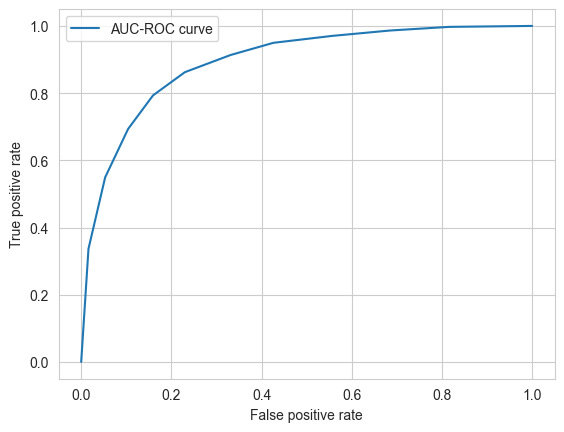

In [205]:
sns.lineplot(x=test_fpr, y=test_tpr, label="AUC-ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

KNN model with k=50

In [206]:
knn_model_50 = KNeighborsClassifier(n_neighbors=50)

In [207]:
knn_model_50.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=50)

In [208]:
test_fpr_50, test_tpr_50, test_thresholds_50 = roc_curve(y_test, knn_model_50.predict_proba(X_test_scaled)[:,1])
test_roc_auc_50 = auc(test_fpr_50, test_tpr_50)

Text(0, 0.5, 'True positive rate')

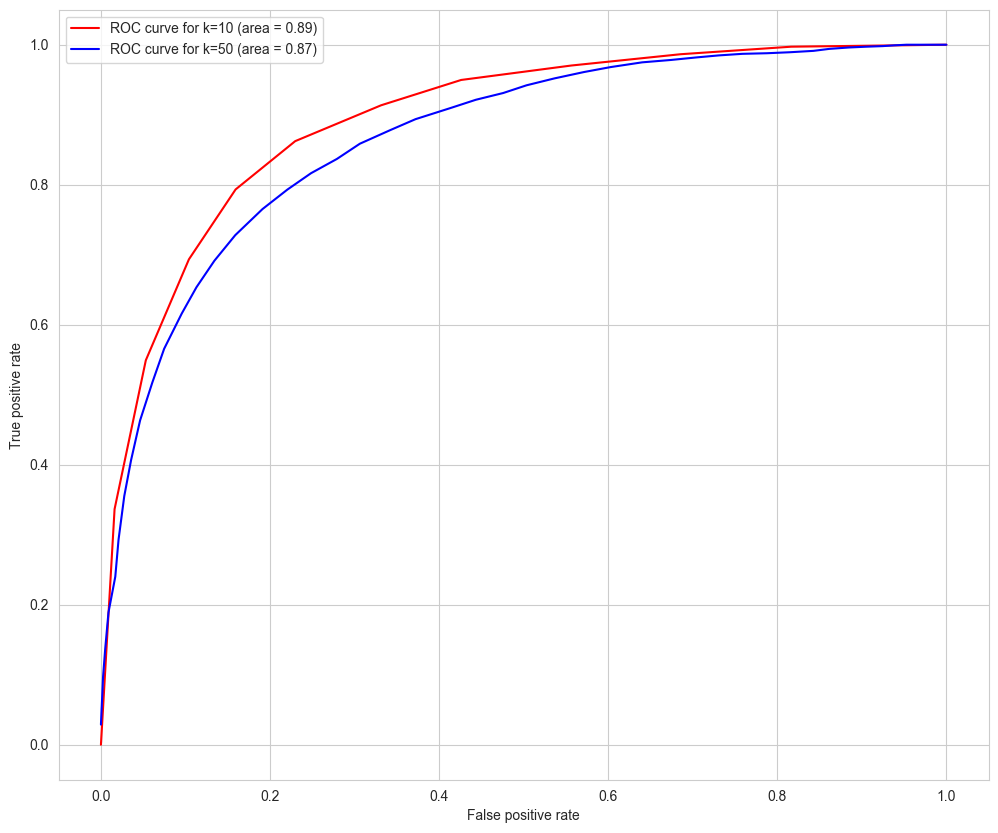

In [212]:
plt.figure(figsize=(12,10))
sns.lineplot(x=test_fpr, y=test_tpr, label="ROC curve for k=10 (area = %0.2f)" % test_roc_auc, color="red")
sns.lineplot(x=test_fpr_50, y=test_tpr_50, label="ROC curve for k=50 (area = %0.2f)" % test_roc_auc_50, color="blue")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")